In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [6]:
n = np.linspace(-1, 1, 21)
x0 = (n != 0).astype(float)

In [7]:
x1 = np.abs(n - 0)
x2 = (n - 0) ** 2

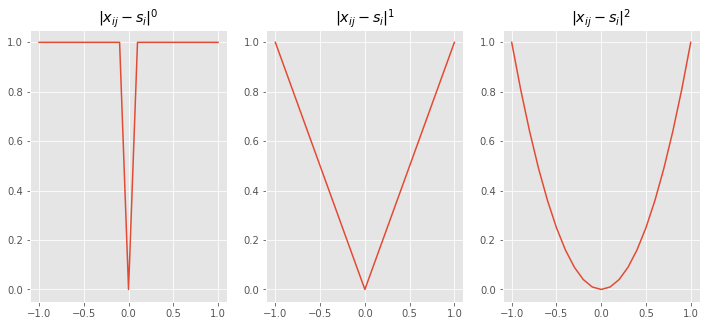

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
ax[0].plot(n, x0)
ax[1].plot(n, x1)
ax[2].plot(n, x2)
ax[0].set_title('$\|x_{ij} - s_{i}\|^0$')
ax[1].set_title('$\|x_{ij} - s_{i}\|^1$')
_ = ax[2].set_title('$\|x_{ij} - s_{i}\|^2$')

In [5]:
n

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [20]:
x = np.random.randint(8, 14, size=(1000,))

In [34]:
from sklearn.preprocessing import MinMaxScaler

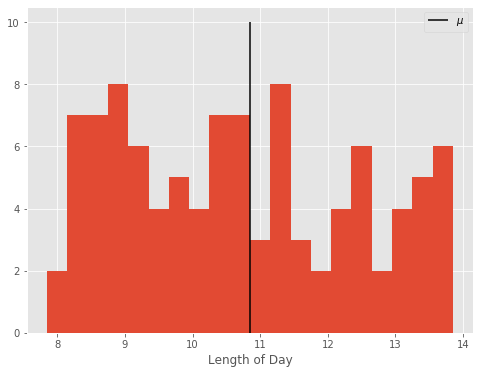

In [47]:
x = np.random.random(size=(100,))
x = MinMaxScaler((8, 14)).fit_transform(x.reshape(-1, 1)).ravel()
plt.figure(figsize=(8, 6))
plt.hist(x, rwidth=1, align='left', bins=20)
plt.vlines(x.mean(), 0, 10, label='$\mu$')
plt.xlabel('Length of Day')
plt.legend()

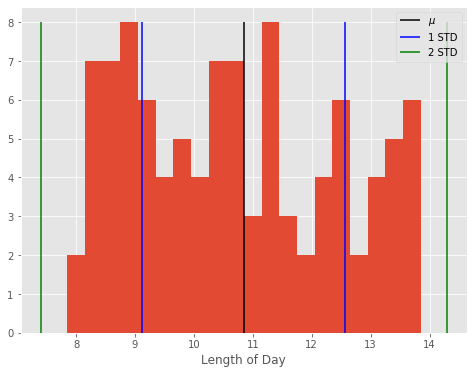

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(x, rwidth=1, align='left', bins=20)
plt.vlines(x.mean(), 0, 8, label='$\mu$')
plt.vlines([x.mean() + x.std(), x.mean() - x.std()], 0, 8, 'b', label='1 STD')
plt.vlines([x.mean() + 2 * x.std(), x.mean() - 2 * x.std()], 0, 8, 'g', label='2 STD')
plt.xlabel('Length of Day')
plt.legend()

In [2]:
import pandas as pd
may = pd.read_csv('/tmp/may.csv')
june = pd.read_csv('/tmp/june.csv')
july = pd.read_csv('/tmp/july.csv')

In [3]:
durations = {}
for month, df in dict(May=may, June=june, July=july).items():
    start = pd.to_datetime(df['sunrise'])
    end = pd.to_datetime(df['sunset'])
    durations[month] = end - start

In [4]:
hours = {}
for k, v in durations.items():
    hours[k] = v.dt.seconds / 3600

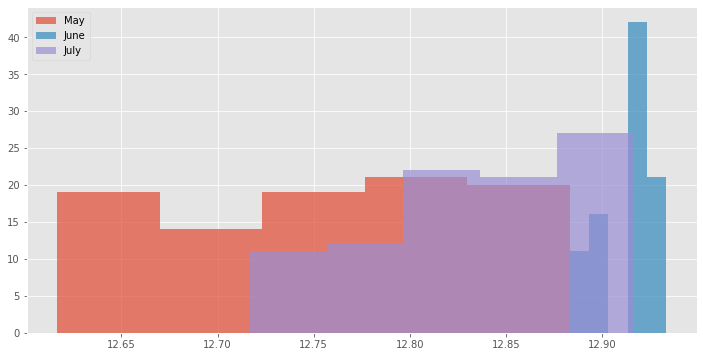

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
for k, v in hours.items():
    v.hist(bins=5, ax=ax, alpha=0.7, label=k)
plt.legend()

In [2]:
salary =[25,34,50,68,80,96]

(0, 80)

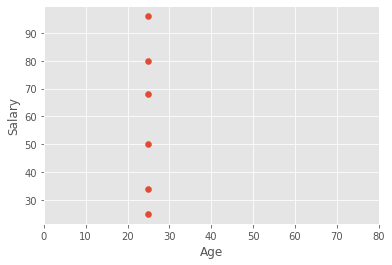

In [4]:
plt.scatter([25] * len(salary), salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xlim(0, 80)

(0, 80)

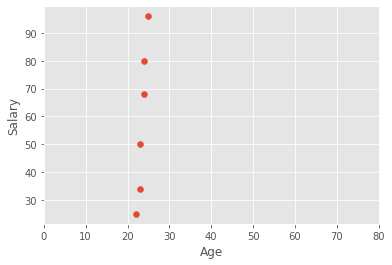

In [5]:
age = [22, 23, 23, 24, 24, 25]
plt.scatter(age, salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xlim(0, 80)

(0, 80)

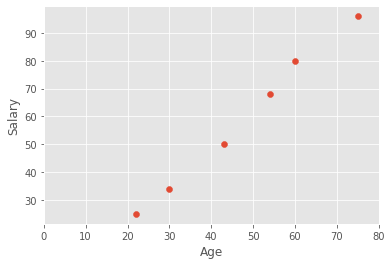

In [6]:
age=[22,30,43,54,60,75]
plt.scatter(age, salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xlim(0, 80)

In [7]:
np.var(age)

321.8888888888889

In [8]:
np.var(salary)

625.4722222222223

In [9]:
np.cov(age, salary)

array([[386.26666667, 536.66666667],
       [536.66666667, 750.56666667]])

In [11]:
(321.88) / (321.88 + 625.47) 

0.33976882883833853

In [12]:
(625.47) / (321.88 + 625.47)

0.6602311711616615

In [13]:
X = np.c_[age, salary]

In [14]:
X

array([[22, 25],
       [30, 34],
       [43, 50],
       [54, 68],
       [60, 80],
       [75, 96]])

(0, 80)

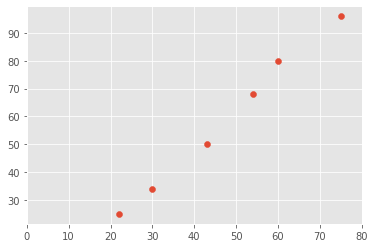

In [16]:
plt.scatter(*X.T)
plt.xlim(0, 80)

In [56]:
X

array([[22, 25],
       [30, 34],
       [43, 50],
       [54, 68],
       [60, 80],
       [75, 96]])

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

array([[ 2621.22231995,  3657.75799492],
       [-3657.75799492,  2621.22231995]])

In [143]:
pca.fit(X)
pcs = pca.components_
pcs *= 20
pc1, pc2 = pcs

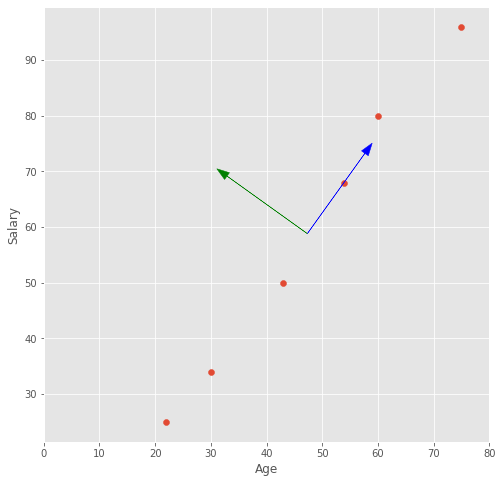

In [141]:
plt.figure(figsize=(8, 8))
plt.scatter(*X.T)

xorg, yorg = X.mean(axis=0)
# plt.scatter(xorg, yorg, marker='o', s=50)
plt.arrow(xorg, yorg, *pc1, color='b', length_includes_head=True, head_width=1.5, label='PC1')
plt.arrow(xorg, yorg, *pc2, color='g', length_includes_head=True, head_width=1.5, label='PC2')
plt.xlim(0, 80)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.gca().set_aspect('equal')

(-1, 1)

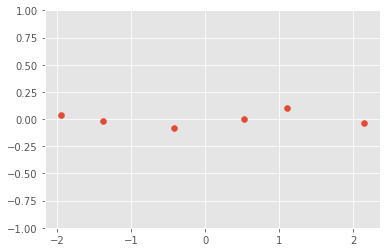

In [159]:
from sklearn.preprocessing import StandardScaler
xnorm = StandardScaler().fit_transform(X)
xred = PCA(n_components=2).fit_transform(xnorm)



Text(-0.15, 0.6, 'PC2')

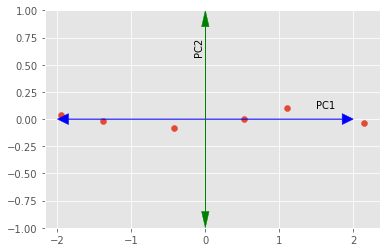

In [171]:
plt.scatter(*xred.T)
plt.ylim(-1, 1)
plt.arrow(0, 0, 2, 0, color='b', length_includes_head=True, head_width=0.1, label='PC1')
plt.arrow(0, 0, -2, 0, color='b', length_includes_head=True, head_width=0.1, label='PC1')
plt.arrow(0, 0, 0, 1, color='g', length_includes_head=True, head_width=0.1, label='PC2')
plt.arrow(0, 0, 0, -1, color='g', length_includes_head=True, head_width=0.1, label='PC2')
plt.text(1.5, 0.1, "PC1")
plt.text(-0.15, 0.6, "PC2", rotation='vertical')

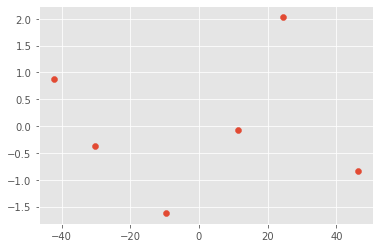

In [98]:
pc2

array([-8.1283511 ,  5.82493849])

In [99]:
pc1

array([5.82493849, 8.1283511 ])

In [25]:
pc2

array([-0.81283511,  0.58249385])

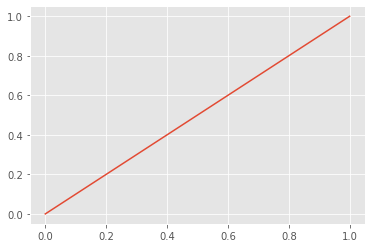

In [33]:
plt.plot([0, 1], [0, 1])

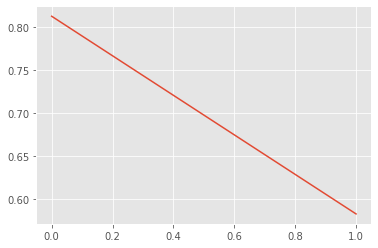

In [29]:
plt.plot(pcs[:, 1])